<a href="https://colab.research.google.com/github/clferreira1985/PUC_RJ-Pos_Ciencia_de_Dados_e_Analytics/blob/main/Machine_Learning/C%C3%B3pia_de_Mopdelo_de_regrerssao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# imports necvessários

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes # para importar o dataset diabete
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import mean_squared_error # métrica de avaliação MSE
from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
from sklearn.linear_model import Ridge # algoritimo Regularização Ridge
from sklearn.linear_model import Lasso # algoritmo Regularização Lasso
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão
from sklearn.svm import SVR # algoritmo SVM


In [21]:
# Carga do dataset
diab = load_diabetes()

# definindo as feature e Label

X = diab['data']
y = diab['target']

# shapes
print(X.shape, y.shape)


(442, 10) (442,)


In [22]:
dataset = pd.DataFrame(X, columns=['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'lgt', 'glu'])

dataset['target'] = diab['target']

dataset.head()


,age,sex,bmi,map,tc,ldl,hdl,tch,lgt,glu,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   map     442 non-null    float64
 4   tc      442 non-null    float64
 5   ldl     442 non-null    float64
 6   hdl     442 non-null    float64
 7   tch     442 non-null    float64
 8   lgt     442 non-null    float64
 9   glu     442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


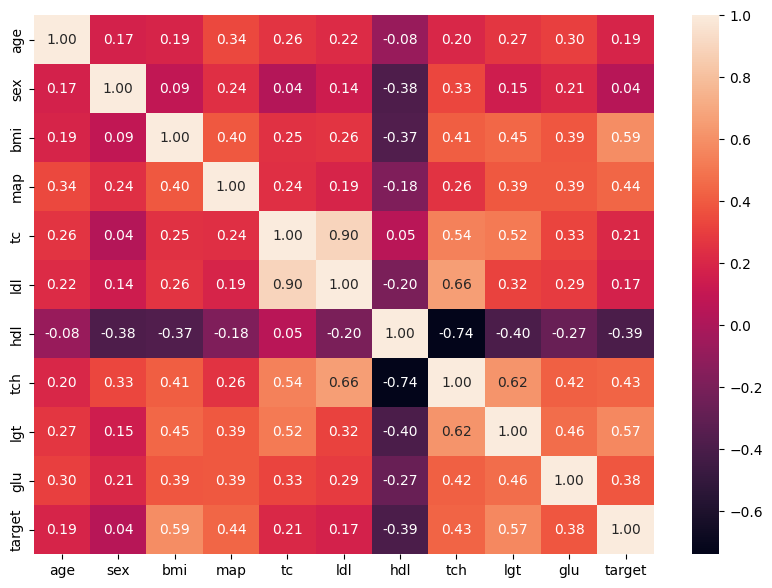

In [24]:
#headmap para vê as correlações 

plt.figure(figsize=(10,7))

#correlation matrix
dataplot = sns.heatmap(dataset.corr(), annot=True, fmt='.2f')

<Figure size 1000x700 with 0 Axes>

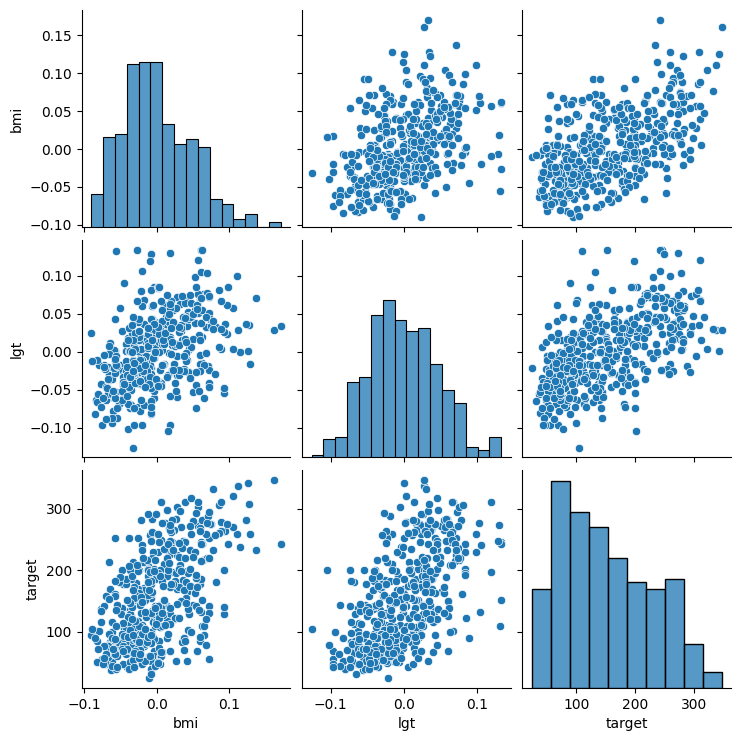

In [25]:
# pairplot

plt.figure(figsize=(10,7))

#plotting graphs
sns.pairplot(dataset[['bmi', 'lgt', 'target']])

In [26]:
from IPython.utils.text import num_ini_spaces
#separação em bases de treino e teste (holdout)
array = dataset.values
X = array[:,0:10] # atributos
y = dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7) #faz a divisão

#criando os folds para validação cruzada


In [29]:
def modelagem(num_particoes):
    # Modelagem

    # Criando os folds para a validação cruzada
    kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=(num_particoes +1)) #faz o particionamento em 10 folds

    #Definindo uma seed global para esta célula de código
    np.random.seed(num_particoes +1)

    # Lista para armazenar os modelos, os resultados e os nomes dos modelos

    models =[]
    results = []
    names = []

    # Preparando os modelos e adicionando-os em uma lista

    models.append(('LR', LinearRegression()))
    models.append(('Ridge', Ridge()))
    models.append(('Lasso', Lasso()))
    models.append(('KNN', KNeighborsRegressor()))
    models.append(('CART', DecisionTreeRegressor()))
    models.append(('SVM', SVR()))

    print(f"Testando modelos para {num_particoes} particoes")

    # Dicionário para armazenar os melhores resultados de acurária e números de partições para cada modelo
    best_results = {}

    #Avaliando um modelo por vez
    for name, model in models:
      cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
      results.append(cv_results)
      names.append(name)
      mean_accuracy = cv_results.mean()
      best_result = best_results.get(name) #Verificar se já existe um melhor resultado para o modelo atual
      if best_result is None or mean_accuracy > best_result['Accuracy']:
         best_results[name] = {'accuracy': mean_accuracy, 'partitions' : num_particoes} # Armazenar o melhor resultado para o modelo atual
      # imprime MSE, devio padrão do MSE e RMSE dos 10 resultados da validação cruzada
      msg = "%s : MSE %0.2f (%0.2f) - RMSE % 0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
      print(msg)

    # Bloxplot de comparaç~]ao dos modelos 

    fig = plt.figure()
    fig.suptitle('Comparação do MSE dos Modelos')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

    return best_results




Testando modelos para 5 particoes
LR : MSE 3065.31 (358.53) - RMSE  55.37
Ridge : MSE 3635.49 (544.46) - RMSE  60.30
Lasso : MSE 3956.95 (584.59) - RMSE  62.90
KNN : MSE 3431.20 (389.34) - RMSE  58.58
CART : MSE 6123.38 (653.66) - RMSE  78.25
SVM : MSE 5363.82 (935.37) - RMSE  73.24


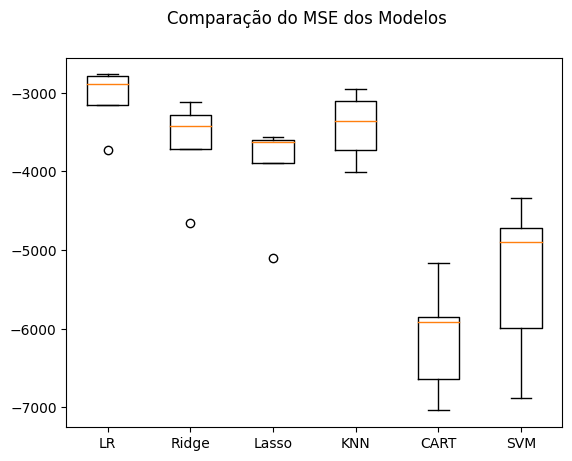

Testando modelos para 6 particoes
LR : MSE 3106.91 (401.02) - RMSE  55.74
Ridge : MSE 3632.66 (504.27) - RMSE  60.27
Lasso : MSE 3963.91 (454.28) - RMSE  62.96
KNN : MSE 3483.91 (496.94) - RMSE  59.02
CART : MSE 6168.63 (1122.25) - RMSE  78.54
SVM : MSE 5336.49 (687.80) - RMSE  73.05


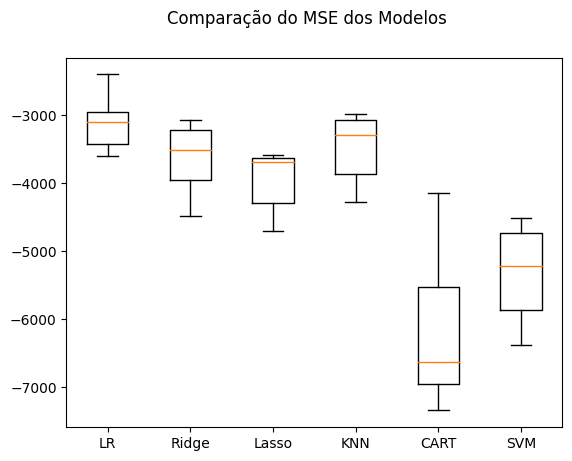

Testando modelos para 7 particoes
LR : MSE 3087.91 (314.84) - RMSE  55.57
Ridge : MSE 3605.90 (517.85) - RMSE  60.05
Lasso : MSE 3955.18 (635.57) - RMSE  62.89
KNN : MSE 3474.96 (264.70) - RMSE  58.95
CART : MSE 6433.90 (1820.88) - RMSE  80.21
SVM : MSE 5355.13 (547.20) - RMSE  73.18


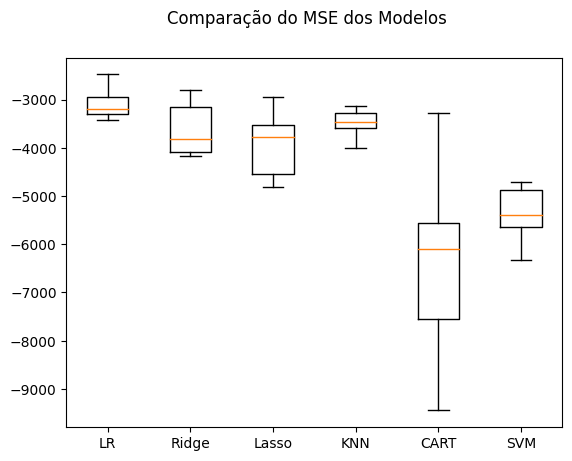

Testando modelos para 8 particoes
LR : MSE 3047.20 (450.06) - RMSE  55.20
Ridge : MSE 3553.79 (505.42) - RMSE  59.61
Lasso : MSE 3903.41 (657.73) - RMSE  62.48
KNN : MSE 3631.94 (616.93) - RMSE  60.27
CART : MSE 6430.27 (1354.51) - RMSE  80.19
SVM : MSE 5273.49 (928.87) - RMSE  72.62


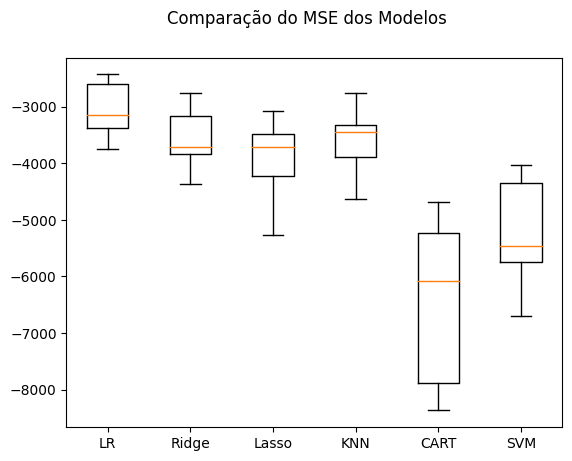

Testando modelos para 9 particoes
LR : MSE 3041.23 (491.43) - RMSE  55.15
Ridge : MSE 3556.82 (613.15) - RMSE  59.64
Lasso : MSE 3933.06 (701.44) - RMSE  62.71
KNN : MSE 3403.01 (667.45) - RMSE  58.34
CART : MSE 6703.29 (942.04) - RMSE  81.87
SVM : MSE 5277.18 (1032.27) - RMSE  72.64


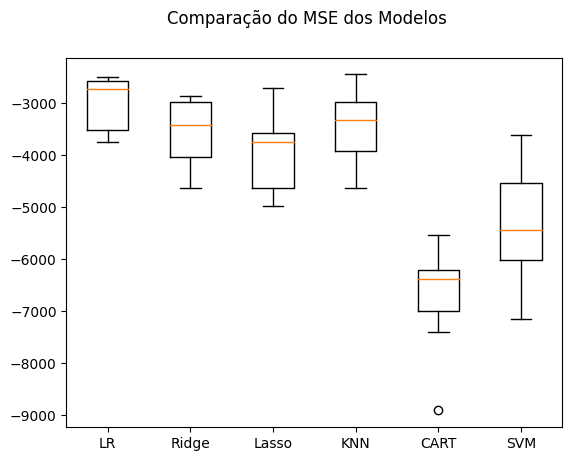

Testando modelos para 10 particoes
LR : MSE 3027.40 (616.35) - RMSE  55.02
Ridge : MSE 3550.74 (570.72) - RMSE  59.59
Lasso : MSE 3931.35 (615.45) - RMSE  62.70
KNN : MSE 3494.03 (598.80) - RMSE  59.11
CART : MSE 6145.25 (1401.96) - RMSE  78.39
SVM : MSE 5273.15 (1000.16) - RMSE  72.62


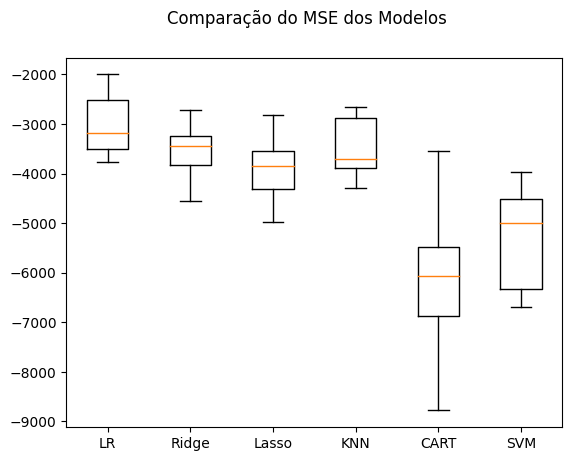

Testando modelos para 11 particoes
LR : MSE 3016.86 (707.12) - RMSE  54.93
Ridge : MSE 3543.24 (682.09) - RMSE  59.53
Lasso : MSE 3928.39 (735.16) - RMSE  62.68
KNN : MSE 3346.97 (953.44) - RMSE  57.85
CART : MSE 7209.57 (2208.10) - RMSE  84.91
SVM : MSE 5262.47 (922.16) - RMSE  72.54


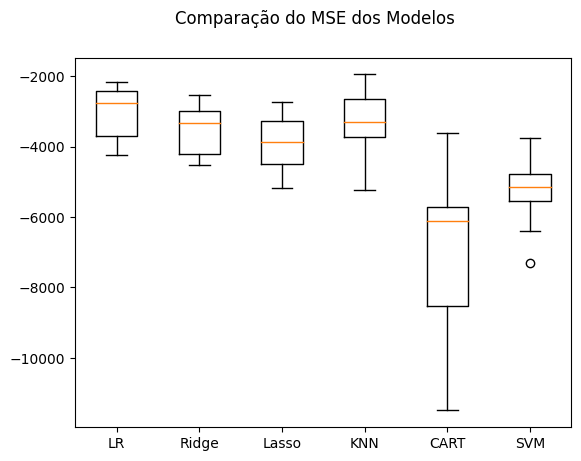

Testando modelos para 12 particoes
LR : MSE 2999.21 (712.92) - RMSE  54.77
Ridge : MSE 3520.57 (721.22) - RMSE  59.33
Lasso : MSE 3901.43 (668.33) - RMSE  62.46
KNN : MSE 3317.35 (1121.45) - RMSE  57.60
CART : MSE 5785.25 (1807.26) - RMSE  76.06
SVM : MSE 5218.85 (954.65) - RMSE  72.24


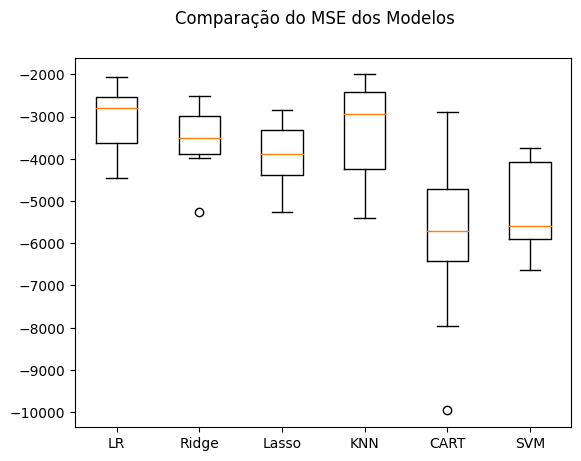

Testando modelos para 13 particoes
LR : MSE 3048.54 (736.38) - RMSE  55.21
Ridge : MSE 3534.66 (732.64) - RMSE  59.45
Lasso : MSE 3923.80 (643.98) - RMSE  62.64
KNN : MSE 3351.77 (928.70) - RMSE  57.89
CART : MSE 6730.13 (1580.13) - RMSE  82.04
SVM : MSE 5241.50 (803.32) - RMSE  72.40


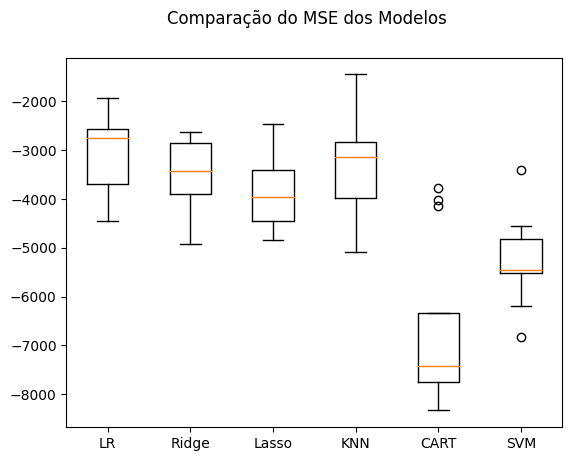

Testando modelos para 14 particoes
LR : MSE 3001.22 (563.78) - RMSE  54.78
Ridge : MSE 3543.87 (560.79) - RMSE  59.53
Lasso : MSE 3942.37 (727.31) - RMSE  62.79
KNN : MSE 3405.15 (745.05) - RMSE  58.35
CART : MSE 6098.01 (1450.96) - RMSE  78.09
SVM : MSE 5271.69 (1221.07) - RMSE  72.61


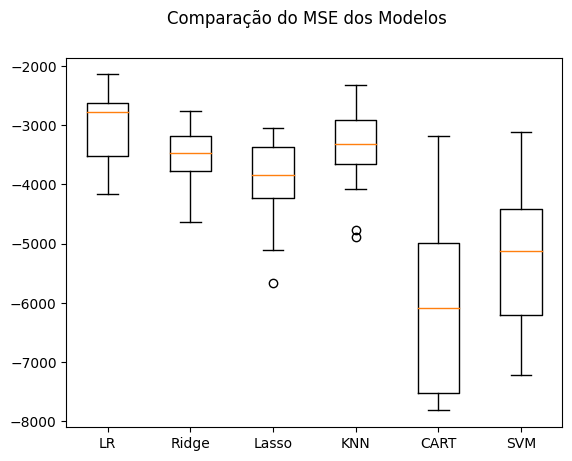

Testando modelos para 15 particoes
LR : MSE 3057.19 (635.42) - RMSE  55.29
Ridge : MSE 3545.67 (871.23) - RMSE  59.55
Lasso : MSE 3928.03 (855.42) - RMSE  62.67
KNN : MSE 3476.63 (991.36) - RMSE  58.96
CART : MSE 6594.71 (2405.07) - RMSE  81.21
SVM : MSE 5277.52 (1545.31) - RMSE  72.65


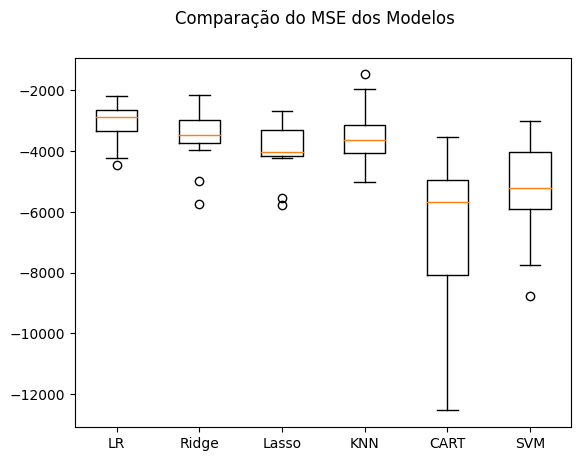

Melho número de partições para cada modelo: 
LR: 15 partições (acurácia: -5277.524905044048)
Ridge: 15 partições (acurácia: -5277.524905044048)
Lasso: 15 partições (acurácia: -5277.524905044048)
KNN: 15 partições (acurácia: -5277.524905044048)
CART: 15 partições (acurácia: -5277.524905044048)
SVM: 15 partições (acurácia: -5277.524905044048)


In [30]:
best_partitions = {}

# Testando para cada número de partições de 5 a 15
for num_particoes in range(5, 16):
    best_results = modelagem(num_particoes)
    for model, result in best_results.items():
        if model not in best_partitions or result['accuracy'] > best_partitions[model]['accuracy']:
            best_partitions[model]={'accuracy': result['accuracy'], 'partitions': result['partitions']}
            
print("Melho número de partições para cada modelo: ")
for model, resul in best_partitions.items():
    print(f"{model}: {result['partitions']} partições (acurácia: {result['accuracy']})")